<H1> Data analysis of a classified Data using K-nearest Neighbours Machine Learning Algorithm

Dataset - Unknown classified Data

In [1]:
#All Imports
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [7]:
df = pd.read_csv('Classified Data',index_col=0)

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [20]:
#Scaling and Standarization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_features = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [22]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [24]:
#Tain and Test Split
X = df_features
y = df['TARGET CLASS']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)

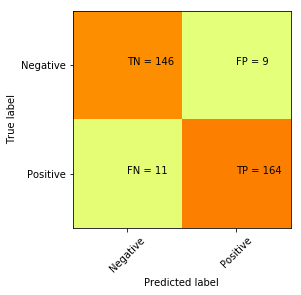


Classification Report:
             precision    recall  f1-score   support

          0       0.93      0.94      0.94       155
          1       0.95      0.94      0.94       175

avg / total       0.94      0.94      0.94       330



In [35]:
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report
CM = confusion_matrix(y_test,pred)
CR = classification_report(y_test,pred)
#print(CM)
plt.clf()
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM[i][j]))
plt.show()
print('\nClassification Report:')
print(CR)

In [36]:
# To check for the best K- value
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train,y_train)
    pred_i = KNN.predict(X_test)
    error.append(np.mean(pred_i != y_test))

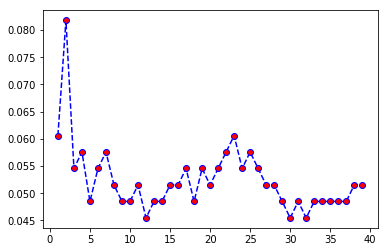

In [47]:
#Viuslize the Error rate
plt.figure()
plt.plot(range(1,40),error,color='blue',marker='o',linestyle='dashed',markerfacecolor='red')

Best possible K-values:


In [58]:
k_value_1 = int(np.sqrt(len(df)))
print(f'Possible good K-Value: {k_value_1} or 13(from the graph above.)')

Possible good K-Value: 31 or 13(from the graph above.)


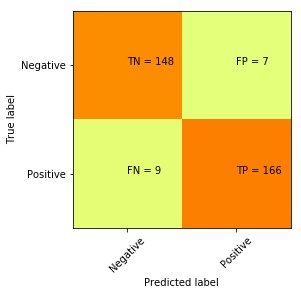


Classification Report:
             precision    recall  f1-score   support

          0       0.94      0.95      0.95       155
          1       0.96      0.95      0.95       175

avg / total       0.95      0.95      0.95       330



In [61]:
KNN = KNeighborsClassifier(n_neighbors=13)
KNN.fit(X_train,y_train)
pred = KNN.predict(X_test)
#Evaluation
from sklearn.metrics import confusion_matrix,classification_report
CM = confusion_matrix(y_test,pred)
CR = classification_report(y_test,pred)
#print(CM)
plt.clf()
plt.imshow(CM, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(CM[i][j]))
plt.show()
print('\nClassification Report:')
print(CR)